<a href="https://colab.research.google.com/github/Andres-Gress/EDP_II/blob/main/MetodoImplicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método implícito de Richardson

Se resolverá la ecuación de calor mediante diferencias regresivas

$\frac{\partial U}{\partial t}=\alpha^2 \frac{\partial^2 U}{\partial x^2} \quad 0<x<1, \quad t>0$

con

$h=0.1 \quad k=0.01 \quad \alpha=1$

sujeta a las restricciones:

$u(0,t)=u(1,t)=0, \quad t>0, \quad u(x,0)=sen(\pi x), \quad 0\leq x \leq 1$

***Solución:***

 Usando la ecuación

$(1+2\lambda)u_{i,j} - \lambda u_{i+1,j} - \lambda u_{i-1,j} = u_{i,j-1}$

$\text{para } \quad i=1,2,...,m-1 \quad \text{ y } \quad j=1,2,3,...$

con $\quad \lambda=α^2 \frac{k}{h^2}=1$

Por lo que la ecuación resulta:

$3u_{i,j} - u_{i+1,j} - u_{i-1,j} = u_{i,j-1}$

A partir de está ecuación se construye la matriz y se calculan los puntos resolviendo un sistema de ecuaciones con factorizacion LU (método de Thomas)

In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Se importar las librerias de sympy para la factorización LU y numpy como libreria auxiliar para definir funciones; así como librerias para hacer las respectivas gráficas

In [2]:
def f(x):
   return np.sin(np.pi*x) #manda a llamar a la función sen(pi*x) cada que se escriba f(x)

Definimos la función $f(x)=sen(\pi x)$ que sería la condición inicial $u(x,0)$

In [3]:
a=0 #Aquí comienza la malla en el eje x
b=1 #Aquí termina la malla en el rango de x
alpha=1
h=0.1
k=0.01
lam= alpha**2 *(k/h**2) #lambda
n=int(((b-a)/h)) - 1 #numero de puntos en la malla sin contar las fronteras u(a,t) y u(b,t), en este caso a=0, b=1

A = np.zeros((n,n)) #Matriz vacía de tamaño nxn

# Llena la matriz A
for i in range(n):
    A[i][i] = 1+2*lam  # diagonal principal
    if i < n - 1:
        A[i][i + 1] = -lam   # diagonal superior
        A[i + 1][i] = -lam  # diagonal inferior

A=sp.Matrix(A) #Para poder usar la facctorizacion LU en sympy
A

Matrix([
[ 3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0]])

Intentando automatizar lo más posible cada cálculo, se implementa los valores del rango de x, es decir a y b, así como los valores de $\alpha,h,k$ y por ende $\lambda$ se calcula a partir de los valores dados, el valor de n que definirá el tamaño del sistema de ecuaciones que se tendrá en forma matricial.
Se llena la matriz tridiagonal que por la ecuación general del método de Richardson los valores de la diagonal son constantes, por lo qué mantiene la misma estructura mientras sean las mismas condiciones de frontera

In [4]:
#Llenamos el vector b usando el valor de h y mandando a llamar f(x)
b_values = []
for i in range(1,n+1):  #Ponemos n+1 para que el ciclo llegue hasta n, es decir, 9
  b_values.append(f(h*i)) #guradamos los valores en b_values
b = sp.Matrix(b_values) #Convierte la matriz b_values en un vector de sympy
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

Rellenamos el vector b usando la información del valor de h para obtener el primer piso de la malla

In [5]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787376],
[0.535378658951812],
[0.281465217775586]])

Con esta línea resolvemos para b mediante factorización LU dada la matriz A y el vector b

In [6]:
def richardson(A,b,j):
    S=[] #aquí guardaremos las iteraciones
    b_1=b.copy() #evita modificar el b_1 original

    for i in range(j+1):
        S.append(np.array(b_1,dtype=float).reshape(-1)) #guarda los valores en S y los hace vectores
        sol=A.LUsolve(b_1) #se llama la factoización LU para b_1 y sus actualizaciones
        b_1=sol
    return np.array(S)

Se define la función del método de Richardson, donde dados los valores de b, aplica iterativamente factorización LU para los pisos posteriores y guarda los valores en una lista

# EJERCICIO 4
Solución exacta de la ecuacion

$u(x,t)=e^{-\pi^2t}sen(\pi x)$

en $t=0.5$

$u(x,0.5)=e^{-\pi^2(0.5)}sen(\pi x)$

In [7]:
def u_exacta(x, t):
    x = np.array(x, dtype=float)  # asegurar floats
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

Solución exacta de la EDP

In [8]:
#Para t=0.5 se necesitan 50 iteraciones
j = 50
U1 = richardson(A, b, j)
U1[j]

array([0.00289802, 0.00551236, 0.00758711, 0.00891918, 0.00937818,
       0.00891918, 0.00758711, 0.00551236, 0.00289802])

Aproximación numérica de la función

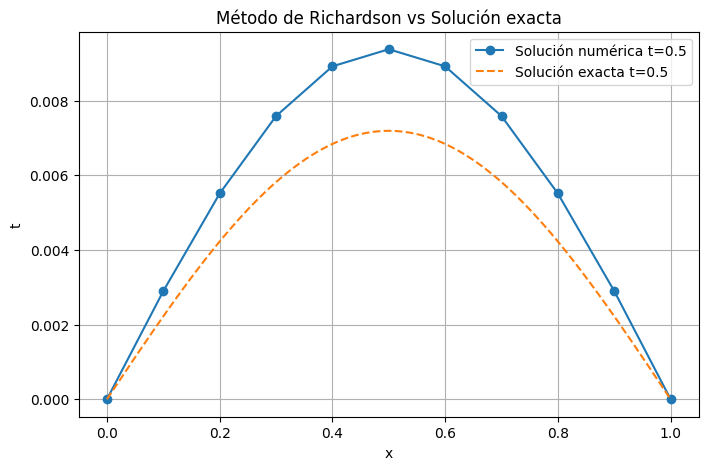

In [9]:
# Crear malla de puntos x1 según el tamaño de la solución (nodos interiores)
n = U1.shape[1]  # número de incógnitas
x_num = np.linspace(h, 1-h, n) #los puntos comienzan en h=0.1 y terminan en 1-h=0.9
x_ex = np.linspace(0,1,200)  # malla fina para la solución exacta

# Agregar puntos de frontera para la solución numérica
x_completo = np.concatenate(([0], x_num, [1])) #para incluir las fronetras x=0 y x=1
U_completo = np.concatenate(([0], U1[j], [0])) #valor de u(0,t)=u(1,t)=0

plt.figure(figsize=(8,5))
plt.plot(x_completo, U_completo, 'o-', label=f'Solución numérica t=0.5') # Solución numérica
plt.plot(x_ex, u_exacta(x_ex, 0.5), '--', label='Solución exacta t=0.5') # Solución exacta
plt.title('Método de Richardson vs Solución exacta')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()


Esta es la compoarativa de la función que es bastante aproximada; pero si cuenta con un error de 0.002 para los puntos más altos, pero cuando j tiende a infinito obtenemos practicamente las mismas funciones

# Ejercicio 5

¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

Sí, se puede hacer una simplificación, pero no de manera directa que conserve exactamente la solución.

Aprovechar la simetría después de resolver el 9x9: una vez obtenidos los primeros 4 nodos y el central, los nodos restantes se pueden reflejar automáticamente. Esto reduce el almacenamiento o el cálculo posterior, pero no reduce el tamaño del sistema que debes resolver.

In [37]:
n2 = int((n + 1)/2)  # Para hacer los primeros 5 nodos y aplicar la simetría a partir de aquí

Definimos n2 para mostrar lo que sucede cuando se intenta reducir a un sistema 5x5

In [38]:
# Matriz tridiagonal reducida
A2 = np.zeros((n2, n2))
for i in range(n2):
    A2[i,i] = 1 + 2*lam
    if i < n2-1:
        A2[i,i+1] = -lam
        A2[i+1,i] = -lam
A2[-1,-1] = 1 + lam  # el nodo central u5 solo tiene vecino de un lado
A2=sp.Matrix(A2)
A2

Matrix([
[ 3.0, -1.0,  0.0,  0.0,  0.0],
[-1.0,  3.0, -1.0,  0.0,  0.0],
[ 0.0, -1.0,  3.0, -1.0,  0.0],
[ 0.0,  0.0, -1.0,  3.0, -1.0],
[ 0.0,  0.0,  0.0, -1.0,  2.0]])

Nueva matriz simplificada

In [39]:
#Llenamos el vector b usando el valor de h y mandando a llamar f(x)
b_values2 = []
for i in range(1,n2+1):  #Ponemos n+1 para que el ciclo llegue hasta n2, es decir, 5
  b_values2.append(f(h*i)) #guradamos los valores en b_values2
b2 = sp.Matrix(b_values2) #Convierte la matriz b_values en un vector de sympy
b2

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0]])

Vector b 5x1

In [40]:
j = 50
U2 = richardson(A2, b2, j)
U2_final = np.array(U2[j], dtype=float).reshape(-1)
U2_final

array([0.0059841 , 0.01148341, 0.0160524 , 0.01932091, 0.02102417])

Aplicando factorización LU para la solución, no obtenemos los mismos valores que el sistema original, porque no se puede aplicar richardson directamente y reducir a 5x5, sino debe haber modificaciones más precisas

In [41]:
j = 50
U = richardson(A, b, j)
U_sim = U[j]

Se tuvo que reolver el sistema 9x9

In [42]:
# Aprovechar la simetría
U_sym = np.array(U_sim, dtype=float)
# Reflejar los nodos respecto al centro
for i in range(n2):
    U_sym[-(i+1)] = U_sym[i]

print("Solución por simetría:")
print(U_sym)

Solución por simetría:
[0.00289802 0.00551236 0.00758711 0.00891918 0.00937818 0.00891918
 0.00758711 0.00551236 0.00289802]


Simplificación al obtener los valores de las $U_i$

In [43]:
j=20  # Número de pasos en el tiempo

J indica el número de iteraciones que hará respecto de t, es decir, los niveles

In [44]:
U=richardson(A,b,j)

Solución de la ecuación U que se resuelve mediante un sistema matricial producido por la Matriz A, el vector b y número j de iteraciones

In [45]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.7, j+1)
X, Y = np.meshgrid(x, y)

rango de x con el número de puntos (9) en la malla interior y en "y" rango y número de pisos

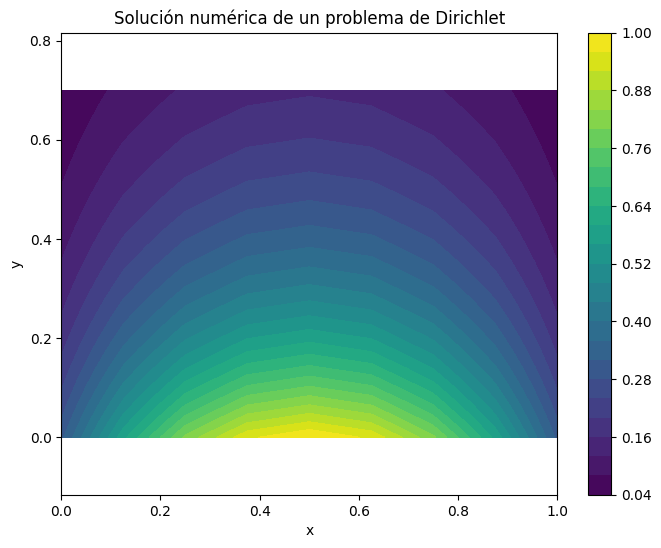

In [47]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

Aquí se ve el comportamiento con un mapa de colores de la ecuación de calor, lo cual tiene bastante sentido, que al pasar el tiempo el calor se disipa dando "0", comienzan ondas o parabolas grandes y va decreciendo.

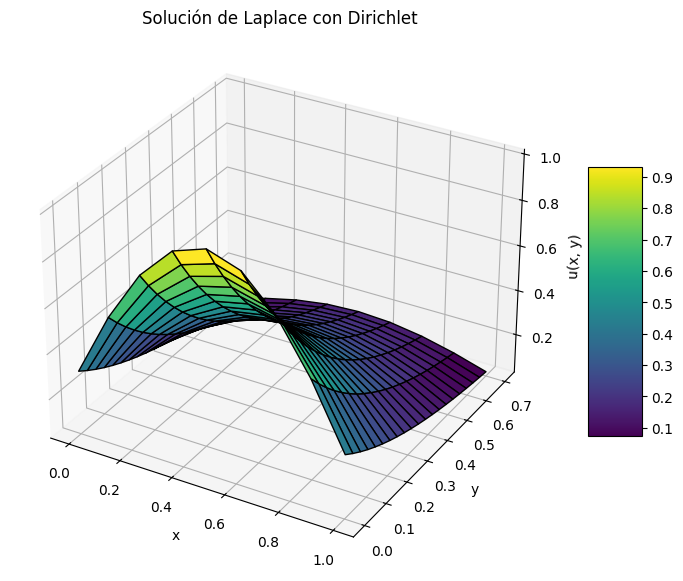

In [19]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

En una gráfica 3D se aprecia mejor como el calor se disipa a través del tiempo, y vemos las formas de lass curvas y su amplitud, dando una figura muy parecida a un hiperboloide, igual aquí interfieren las condiciones iniciales y las de frontera

# Ejercicio 6

Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

In [ ]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.7, j+1)
X, Y = np.meshgrid(x, y)

Estamos estirando la grafica en esta parte

y = np.linspace(0, 0.7, j+1)

Y no se está tomando en cuenta las fronteras, por lo que quizá vareen un poco la verdadera apariencia de las mismas